In [1]:
import pandas as pd
import numpy as np
import sklearn

In [22]:
df = pd.read_csv("creditscores.csv")
print(df)
df.describe()

     INCOME  SAVINGS     DEBT  r_SAVINGS_INCOME  r_DEBT_INCOME  \
0     33269        0   532304          0.000000      16.000000   
1     77158    91187   315648          1.181822       4.090930   
2     30917    21642   534864          0.700003      17.299997   
3     80657    64526   629125          0.800005       7.800005   
4    149971  1172498  2399531          7.818165      15.999967   
..      ...      ...      ...               ...            ...   
995  328892  1465066  5501471          4.454550      16.727287   
996   81404    88805   680837          1.090917       8.363680   
997       0    42428    30760          2.480770       4.600004   
998   36011     8002   604181          0.222210      16.777679   
999   44266   309859    44266          6.999932       1.000000   

     r_DEBT_SAVINGS  T_CLOTHING_12  r_CLOTHING_INCOME  r_CLOTHING_SAVINGS  \
0          2.000000           1889           0.056780            0.017560   
1          3.461546           5818           0.075404

,INCOME,SAVINGS,DEBT,r_SAVINGS_INCOME,r_DEBT_INCOME,r_DEBT_SAVINGS,T_CLOTHING_12,r_CLOTHING_INCOME,r_CLOTHING_SAVINGS,r_CLOTHING_DEBT,...,r_EXPENDITURE_SAVINGS,r_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,DEFAULT,CREDIT_SCORE
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,121610.019000,4.131896e+05,7.907180e+05,3.956404,5.891885,5.859327,6822.401000,0.054744,0.047902,0.028368,...,0.907817,0.547951,0.380000,0.944000,0.236000,0.173000,0.993000,0.15000,0.284000,586.712000
std,113716.699591,4.429160e+05,9.817904e+05,3.899804,5.730114,16.779111,7486.225932,0.036910,0.097672,0.083002,...,1.624937,1.272734,0.485629,0.230037,0.424835,0.378437,0.083414,0.35725,0.451162,63.413882
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.003427,0.000000,0.000000,...,0.067568,0.033784,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,300.000000
25%,30450.250000,5.971975e+04,5.396675e+04,1.099994,1.500003,0.216552,1084.500000,0.030017,0.005040,0.004751,...,0.160650,0.103093,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,554.750000
50%,85090.000000,2.738505e+05,3.950955e+05,2.480770,4.600004,2.000000,4494.000000,0.046161,0.017560,0.011677,...,0.322581,0.169492,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,596.000000
75%,181217.500000,6.222600e+05,1.193230e+06,5.931870,8.300010,4.499991,10148.500000,0.066365,0.053562,0.024524,...,0.833333,0.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.00000,1.000000,630.000000
max,662094.000000,2.911863e+06,5.968620e+06,16.111198,37.000555,292.842105,43255.000000,0.251702,1.676623,1.267383,...,10.009852,10.005277,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,800.000000


In [3]:
x = df.drop(['CREDIT_SCORE'], axis = 1)
y = df['CREDIT_SCORE']
print(x, "\n")
print(y)

     INCOME  SAVINGS     DEBT  r_SAVINGS_INCOME  r_DEBT_INCOME  \
0     33269        0   532304          0.000000      16.000000   
1     77158    91187   315648          1.181822       4.090930   
2     30917    21642   534864          0.700003      17.299997   
3     80657    64526   629125          0.800005       7.800005   
4    149971  1172498  2399531          7.818165      15.999967   
..      ...      ...      ...               ...            ...   
995  328892  1465066  5501471          4.454550      16.727287   
996   81404    88805   680837          1.090917       8.363680   
997       0    42428    30760          2.480770       4.600004   
998   36011     8002   604181          0.222210      16.777679   
999   44266   309859    44266          6.999932       1.000000   

     r_DEBT_SAVINGS  T_CLOTHING_12  r_CLOTHING_INCOME  r_CLOTHING_SAVINGS  \
0          2.000000           1889           0.056780            0.017560   
1          3.461546           5818           0.075404

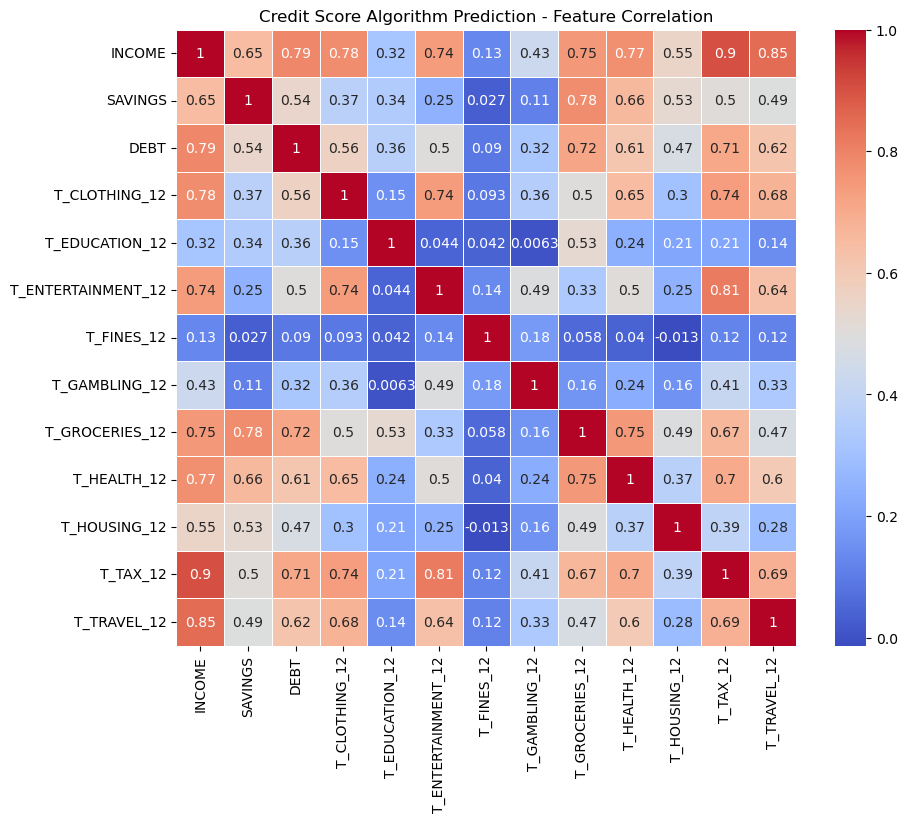

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
select = ['INCOME', 'SAVINGS', 'DEBT', 'T_CLOTHING_12', 'T_EDUCATION_12', 'T_ENTERTAINMENT_12', 'T_FINES_12', 'T_GAMBLING_12', 'T_GROCERIES_12', 'T_HEALTH_12', 'T_HOUSING_12', 'T_TAX_12', 'T_TRAVEL_12']
x_continuous = x[select]#select_dtypes(include=['int64', 'float64'])
corr_matrix = x_continuous.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Credit Score Algorithm Prediction - Feature Correlation')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [5]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state = 42)

In [7]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [10, 20, 30],              # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

# Set up the grid search
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


In [8]:
print(f"Best parameters found: {best_params}")
best_model = grid_search.best_estimator_

Best parameters found: {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [9]:
y_pred = best_model.predict(x_test)

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
mean_absolute_error(y_pred, y_test)

24.29842914540204

In [12]:
mean_squared_error(y_pred, y_test)

1140.2984129657516

In [13]:
r2_score(y_pred, y_test)

0.6068617085459279